# Extract Data from all the 1999-2015 flat files found in the online archive

Instead, we will use the `.mbox` files sent by Jason later

In [87]:
import os
from dateutil import parser
import pandas as pd
import numpy as np
import re
import email

In [88]:
%matplotlib inline

In [89]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [90]:

path = '/Users/nus/twenty-years-of-bldgsim-textmining/txt_files/'
#file = open('/Users/millerc/Dropbox/CODE/BLDG-SIM Analysis/2012-December.txt')
filelist = os.listdir(path)
os.chdir(path)



In [91]:
filelist

['2004-April.txt',
 '2010-January.txt',
 '2003-March.txt',
 '2003-May.txt',
 '2015-February.txt',
 '2013-May.txt',
 '2003-August.txt',
 '2012-February.txt',
 '2005-September.txt',
 '2008-October.txt',
 '2012-September.txt',
 '2010-April.txt',
 '2010-July.txt',
 '2007-February.txt',
 '2011-July.txt',
 '2014-October.txt',
 '2000-February.txt',
 '1999-September.txt',
 '1999-October.txt',
 '2001-September.txt',
 '2009-April.txt',
 '2001-October.txt',
 '2010-June.txt',
 '2011-June.txt',
 '2005-January.txt',
 '2012-August.txt',
 '1999-December.txt',
 '2001-February.txt',
 '2006-February.txt',
 '2004-October.txt',
 '1999-November.txt',
 '.DS_Store',
 '1999-March.txt',
 '2013-February.txt',
 '2002-April.txt',
 '2005-March.txt',
 '2000-January.txt',
 '2014-February.txt',
 '2011-March.txt',
 '2007-July.txt',
 '2006-July.txt',
 '2012-May.txt',
 '2002-May.txt',
 '2011-September.txt',
 '2006-August.txt',
 '2006-September.txt',
 '2015-January.txt',
 '2009-January.txt',
 '2008-March.txt',
 '2002-Sept

In [92]:
DataList = []
BodyList = []

#Open all the files one at a time
for file in filelist:
    i=0
    openfile = open(file)
    linelist = [line for line in openfile.readlines()]
    linelistmax=len(linelist)

    #Iterate through each file and find the From:, Date:, and Subject: for each email
    body = []
    while i < linelistmax:
        
        try:
            if linelist[i][:5] == 'From:':
                if linelist[i+2][:8] == 'Subject:':              
                    WholeDate = parser.parse(linelist[i+1][6:]).replace(tzinfo=None)
                    #Date = WholeDate.date()
#                    YearMonth = WholeDate.replace(day=0)
                    DataEntry = (linelist[i][5:], WholeDate, linelist[i+2][19:])
                    DataList.append(DataEntry)
                    BodyList.append(" ".join(str(x) for x in body))
                    body = []
                else:
                    body.append(linelist[i-1])
            else:
                body.append(linelist[i-1])
        except ValueError:
            print 'Bad Date: '+linelist[i+1]
        i+=1
    #BodyList.append(body)
    print "Finished Loading "+file
BodyList.append(" ".join(str(x) for x in body))

In [93]:
len(BodyList)

19592

In [94]:
body_df = pd.DataFrame({"Body":BodyList[1:]})

In [95]:
body_df.iloc[-1].Body.strip()

'From: Mmullins at hecenergy.com (Mark Mullins)\n Date: Mon, 02 Aug 1999 18:03:42 -0400\n Subject: [BLDG-SIM] Fan-powered VAV systems in DOE-2\n Message-ID: <MDAEMON-F199908030958.AA581554MD63745@gard.com>\n \n To PowerDOE/DOE-2 users:\n Has anyone out there successfully modeled a DX fan-powered VAV system in doe-2.2 or doe-2.1e?  If so, what system did you use and how did you model the fan box part of it?  \n \n The system I have in mind must have the following functionality:\n -VAV\n -DX cooling\n -Evaporative condensing\n -Parallel fan-powered boxes that induce air from a plenum\n -Thermostatically contolled reheat in the VAV box\n \n This is one of the most common types of HVAC systems around, so I am wondering if someone out there has had any more luck than me in attempting to conquer the challanges of accurately modeling its controls & functionality.  \n \n Any thoughts?\n \n \n \n ===========================\n You received this e-mail because you are subscribed \n to the BLDG-SI

In [96]:
BodyList[1]

'From: miket at etcgrp.com (Mike Tillou)\n Date: Mon, 12 Apr 2004 12:55:46 -0600\n Subject: [BLDG-SIM] Curtain wall frames and fenestration area\n Message-ID: <MDAEMON-F200404121353.AA5358375pd80000085881@gard.com>\n \n Has anyone actually done a comparison to see what sort of effect modeling the frame different ways has on the actual loads in the space.  I realize there is no panacea answer but I would be curious to know what the effect of modeling a single window with enlarged frame area vs actual window size and frame width is.  Is it a 5% difference or a 20% or .05%.  I am curious only because I have always assumed the difference was small and that there were more important (larger impact) modeling items to worry about.  \n  \n Please note that I am not trying to discount the importance of correctly modeling windows but trying to understand the overall impact different modeling techniques might have on output.    \n  \n Mike Tillou\n etc Group, Inc. \n _____________________________

In [97]:
body_df.info()

In [98]:

bldgsimdata = pd.DataFrame(data=DataList,columns=['From','DateTime','Subject'])
bldgsimdata = pd.concat([bldgsimdata, body_df], axis=1)

# NumberPerDay = bldgsimdata.groupby('Date').size()
# NumberPerDayIndex = pd.DatetimeIndex(NumberPerDay.index)
# NumberPerDay=NumberPerDay.reindex(index=NumberPerDayIndex)
# NumberPerMonth = NumberPerDay.resample('M').sum()

# AggSubjects = bldgsimdata.groupby('Subject').size()

# PeopleFreq = bldgsimdata.groupby('From').size()
# # PeopleFreq = PeopleFreq.sort()

# monthgrouped = NumberPerDay.groupby(lambda x: x.month)
# monthlystats = monthgrouped.agg({'monthlysum': np.sum, 'dailymean': np.mean})

In [99]:
#AggSubjects

In [100]:
bldgsimdata.info()

In [101]:
#PeopleFreq.sort_values()

In [102]:
bldgsimdata

,From,DateTime,Subject,Body
0,miket at etcgrp.com (Mike Tillou)\n,2004-04-12 12:55:46,Curtain wall frames and fenestration area\n,From: miket at etcgrp.com (Mike Tillou)\n Date...
1,Vikram at ensargroup.com (Vikram Sami)\n,2004-04-12 11:56:20,format of the list\n,From: Vikram at ensargroup.com (Vikram Sami)\n...
2,fporter at archenergy.com (Fred Porter)\n,2004-04-12 10:48:57,Curtain wall frames and fenestration area\n,From: fporter at archenergy.com (Fred Porter)\...
3,cbarnaby at wrightsoft.com (Chip Barnaby)\n,2004-04-12 12:42:12,format of the list\n,From: cbarnaby at wrightsoft.com (Chip Barnaby...
4,stvgates at pacbell.net (stvgates at pacbell....,2004-04-12 08:57:19,Curtain wall frames and fenestration area\n,From: stvgates at pacbell.net (stvgates at pac...
5,astevens at dmiinc.com (Alec Stevens)\n,2004-04-12 11:50:55,format of the list\n,From: astevens at dmiinc.com (Alec Stevens)\n ...
6,miket at etcgrp.com (Mike Tillou)\n,2004-04-12 08:44:01,Curtain wall frames and fenestration area\n,From: miket at etcgrp.com (Mike Tillou)\n Date...
7,"razerbegi at rmhgroup.com (Azerbegi, Renee)\n",2004-04-12 07:44:05,Curtain wall frames and fenestration area\n,"From: razerbegi at rmhgroup.com (Azerbegi, Ren..."
8,cj at cr-jay.ca (Chris Jones)\n,2004-04-12 07:25:42,Radiant Heating/Cooling\n,From: cj at cr-jay.ca (Chris Jones)\n Date: Mo...
9,dlombard at retec.com (Debra Lombard)\n,2004-04-07 13:48:17,Question @ Using eQuest for daylighting analy...,From: dlombard at retec.com (Debra Lombard)\n ...


In [103]:
#bldgsimdata.sort_values("Date")

In [104]:
# bldgsimdata['name'] = bldgsimdata.From.apply(lambda x: re.findall('\(([^)]+)', x))
# bldgsimdata['name'] = bldgsimdata['name']

In [105]:
#type(bldgsimdata.name.ix[1])

# Get data from .mbox

https://gist.github.com/shkesar/be9009d83b82548edd16cd5a7d300457

In [106]:
from mailbox import mbox
import csv

def store_content(message, body=None):
    if not body:
        body = message.get_payload(decode=True)
    if len(message):
        contents = {
            "subject": message['subject'] or "",
            "body": body,
            "from": message['from'],
            "to": message['to'],
            "date": message['date'],
            "labels": message['X-Gmail-Labels'],
            "epilogue": message.epilogue,
        }
        return df.append(contents, ignore_index=True)

# Create an empty DataFrame with the relevant columns
df = pd.DataFrame(
    columns=("subject", "body", "from", "to", "date", "labels", "epilogue"))

# Import your downloaded mbox file
box = mbox('/Users/nus/bldgsim-topicmodeling/mbox-to-txt-master/2015-05-06_2018-11-08-bldg-sim-onebuilding.org.mbox')

fails = []
for message in box:
    try:
        if message.get_content_type() == 'text/plain':
            df = store_content(message)
        elif message.is_multipart():
            # plaintext from multipart messages
            for part in message.get_payload():
                if part.get_content_type() == 'text/plain':
                    df = store_content(message, part.get_payload(decode=True))
                    break
    except:
        fails.append(message)

In [107]:
df.date = pd.to_datetime(df.date)

In [108]:
# df['from']

In [109]:
df.body[1]

"Good Afternoon,  We have an Energy Modeling Analyst position available in our New York City office.  Please see job description details below.\n\nEnergy Modeling Analyst                                             New York, NY\n\nCosentini Associates (www.cosentini.com<http://www.cosentini.com>), a Tetra Tech company, is seeking an Energy Modeling Analyst to join our high performance buildings team. Cosentini is an international engineering firm specializing in building systems design for a range of projects, including office and residential buildings, laboratories, retail, academic and government facilities, museums, tenant interiors and more.\n\nAbout this opportunity:\nYour projects will typically involve advanced energy modeling analysis for high rise commercial and residential buildings.  You will collect data, build models and perform simulations using contract documents prepared by the project Architect and Engineer. You will write reports communicating energy analysis findings

Get the message contents from files - old way that's not used anymore

In [110]:
# out_array = []
# snippets = []


# for file in filelist:
#     i=0
#     openfile = open(file)
#     linelist = [line for line in openfile.readlines()]
#     linelistmax=len(linelist)
#     print "Processing "+file

#     with open(file, mode="r") as bigfile:
#         for line in bigfile:
#             try:
#                 if line.startswith("From:"):
#                     out_array.append(line)
#                     snippets.append( line[0:min(len(line),100)] )
#                 else:
#                     out_array[-1] += line
#             except:
#                 print line

# Merge the data and output as a pickle that can be used in further analysis

In [111]:
bldgsimdata

,From,DateTime,Subject,Body
0,miket at etcgrp.com (Mike Tillou)\n,2004-04-12 12:55:46,Curtain wall frames and fenestration area\n,From: miket at etcgrp.com (Mike Tillou)\n Date...
1,Vikram at ensargroup.com (Vikram Sami)\n,2004-04-12 11:56:20,format of the list\n,From: Vikram at ensargroup.com (Vikram Sami)\n...
2,fporter at archenergy.com (Fred Porter)\n,2004-04-12 10:48:57,Curtain wall frames and fenestration area\n,From: fporter at archenergy.com (Fred Porter)\...
3,cbarnaby at wrightsoft.com (Chip Barnaby)\n,2004-04-12 12:42:12,format of the list\n,From: cbarnaby at wrightsoft.com (Chip Barnaby...
4,stvgates at pacbell.net (stvgates at pacbell....,2004-04-12 08:57:19,Curtain wall frames and fenestration area\n,From: stvgates at pacbell.net (stvgates at pac...
5,astevens at dmiinc.com (Alec Stevens)\n,2004-04-12 11:50:55,format of the list\n,From: astevens at dmiinc.com (Alec Stevens)\n ...
6,miket at etcgrp.com (Mike Tillou)\n,2004-04-12 08:44:01,Curtain wall frames and fenestration area\n,From: miket at etcgrp.com (Mike Tillou)\n Date...
7,"razerbegi at rmhgroup.com (Azerbegi, Renee)\n",2004-04-12 07:44:05,Curtain wall frames and fenestration area\n,"From: razerbegi at rmhgroup.com (Azerbegi, Ren..."
8,cj at cr-jay.ca (Chris Jones)\n,2004-04-12 07:25:42,Radiant Heating/Cooling\n,From: cj at cr-jay.ca (Chris Jones)\n Date: Mo...
9,dlombard at retec.com (Debra Lombard)\n,2004-04-07 13:48:17,Question @ Using eQuest for daylighting analy...,From: dlombard at retec.com (Debra Lombard)\n ...


In [112]:
bldgsimdata_new = df[["from","date","subject","body"]]

In [113]:
bldgsimdata_new.columns = ["From","DateTime","Subject","Body"]

In [114]:
bldgsimdata_new

,From,DateTime,Subject,Body
0,"""Christian Stalberg"" <christian@naturalintelli...",2015-04-06 14:38:15,[Bldg-sim] TRAINING: DesignBuilder/EnergyPlus ...,DesignBuilder/EnergyPlus Training\n\nDesignBui...
1,"""Soto-Alvarez, Diana"" <DSoto-Alvarez@cosentini...",2015-04-07 20:09:33,[Bldg-sim] Energy Modeling Analyst position av...,"Good Afternoon, We have an Energy Modeling An..."
2,Joe Chappell <Joe.Chappell@designengineers.com>,2015-04-07 22:21:30,[Bldg-sim] LEED/Appendix G - Laboratory Question,"Hi all,\n\nI have a question related to modeli..."
3,Evgenia Gorbachinsky <gorbachinsky@gmail.com>,2015-04-08 15:57:16,Re: [Bldg-sim] LEED/Appendix G - Laboratory Qu...,"Joe,\n\nI have always modeled lab spaces with ..."
4,Nathan Miller <nathanm@rushingco.com>,2015-04-08 18:18:16,[Bldg-sim] HELP WANTED: Energy Modeler- Seattl...,"Energy Modeler\nRushing is seeking a dynamic, ..."
5,"""Sami, Vikram"" <vikram.sami@zgf.com>",2015-04-08 19:08:32,Re: [Bldg-sim] LEED/Appendix G - Laboratory Qu...,I agree with Genia - you should probably model...
6,Chris Murphy <cmurphy@cenergistic.com>,2015-04-09 14:23:51,[Bldg-sim] HELP WANTED - Adjustments Analyst,Position Description: Adjustments Analyst – F...
7,Nikola Kravik <NKravik@willdan.com>,2015-04-09 18:30:15,[Bldg-sim] 2013 Title 24 Nonresidential Compli...,"Greetings all,\n\nIBPSA USA San Francisco Chap..."
8,Rathna Shree <rathnashreep@yahoo.in>,2015-04-10 12:33:46,[Bldg-sim] Fan power calculations-MERV-16,"Dear All,\nWe are working on a project with ME..."
9,Jim Dirkes <jim@buildingperformanceteam.com>,2015-04-10 12:58:52,Re: [Bldg-sim] Fan power calculations-MERV-16,"Rathna,\nAssuming the you are referring to an ..."


In [115]:
total_bldgsim = pd.concat([bldgsimdata, bldgsimdata_new], axis=0).reset_index(drop=True)

In [116]:
total_bldgsim

,From,DateTime,Subject,Body
0,miket at etcgrp.com (Mike Tillou)\n,2004-04-12 12:55:46,Curtain wall frames and fenestration area\n,From: miket at etcgrp.com (Mike Tillou)\n Date...
1,Vikram at ensargroup.com (Vikram Sami)\n,2004-04-12 11:56:20,format of the list\n,From: Vikram at ensargroup.com (Vikram Sami)\n...
2,fporter at archenergy.com (Fred Porter)\n,2004-04-12 10:48:57,Curtain wall frames and fenestration area\n,From: fporter at archenergy.com (Fred Porter)\...
3,cbarnaby at wrightsoft.com (Chip Barnaby)\n,2004-04-12 12:42:12,format of the list\n,From: cbarnaby at wrightsoft.com (Chip Barnaby...
4,stvgates at pacbell.net (stvgates at pacbell....,2004-04-12 08:57:19,Curtain wall frames and fenestration area\n,From: stvgates at pacbell.net (stvgates at pac...
5,astevens at dmiinc.com (Alec Stevens)\n,2004-04-12 11:50:55,format of the list\n,From: astevens at dmiinc.com (Alec Stevens)\n ...
6,miket at etcgrp.com (Mike Tillou)\n,2004-04-12 08:44:01,Curtain wall frames and fenestration area\n,From: miket at etcgrp.com (Mike Tillou)\n Date...
7,"razerbegi at rmhgroup.com (Azerbegi, Renee)\n",2004-04-12 07:44:05,Curtain wall frames and fenestration area\n,"From: razerbegi at rmhgroup.com (Azerbegi, Ren..."
8,cj at cr-jay.ca (Chris Jones)\n,2004-04-12 07:25:42,Radiant Heating/Cooling\n,From: cj at cr-jay.ca (Chris Jones)\n Date: Mo...
9,dlombard at retec.com (Debra Lombard)\n,2004-04-07 13:48:17,Question @ Using eQuest for daylighting analy...,From: dlombard at retec.com (Debra Lombard)\n ...


In [117]:
total_bldgsim.index = total_bldgsim.DateTime

In [118]:
total_bldgsim = total_bldgsim.sort_index()

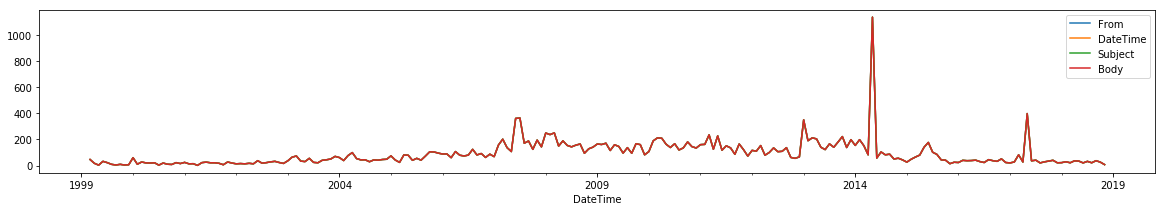

In [119]:
total_bldgsim.resample('M').count().plot(figsize=(20,3))

## Looks like there is an anomalous day in 2014


In [120]:
total_bldgsim.truncate(before='2014-05-08 16:00', after='2014-05-08 17:00')#.resample('D').count().plot(figsize=(20,3))

,From,DateTime,Subject,Body
DateTime,,,,
2014-05-08 16:17:00,bogus@does.not.exist.com ()\n,2014-05-08 16:17:00,\n,"From: bogus@does.not.exist.com ()\n Date: Thu,..."
2014-05-08 16:17:00,bogus@does.not.exist.com ()\n,2014-05-08 16:17:00,\n,"From: bogus@does.not.exist.com ()\n Date: Thu,..."
2014-05-08 16:17:00,bogus@does.not.exist.com ()\n,2014-05-08 16:17:00,\n,"From: bogus@does.not.exist.com ()\n Date: Thu,..."
2014-05-08 16:17:00,bogus@does.not.exist.com ()\n,2014-05-08 16:17:00,\n,"From: bogus@does.not.exist.com ()\n Date: Thu,..."
2014-05-08 16:17:00,bogus@does.not.exist.com ()\n,2014-05-08 16:17:00,\n,"From: bogus@does.not.exist.com ()\n Date: Thu,..."
2014-05-08 16:17:00,bogus@does.not.exist.com ()\n,2014-05-08 16:17:00,\n,"From: bogus@does.not.exist.com ()\n Date: Thu,..."
2014-05-08 16:17:00,bogus@does.not.exist.com ()\n,2014-05-08 16:17:00,\n,"From: bogus@does.not.exist.com ()\n Date: Thu,..."
2014-05-08 16:17:00,bogus@does.not.exist.com ()\n,2014-05-08 16:17:00,\n,"From: bogus@does.not.exist.com ()\n Date: Thu,..."
2014-05-08 16:17:00,bogus@does.not.exist.com ()\n,2014-05-08 16:17:00,\n,"From: bogus@does.not.exist.com ()\n Date: Thu,..."


In [121]:
total_bldgsim.truncate(before='2014-05-08 16:00', after='2014-05-08 17:00').index[0]#.resample('D').count().plot(figsize=(20,3))


Timestamp('2014-05-08 16:17:00')

In [122]:
total_bldgsim = total_bldgsim.drop([total_bldgsim.truncate(before='2014-05-08 16:00', after='2014-05-08 17:00').index[0]])


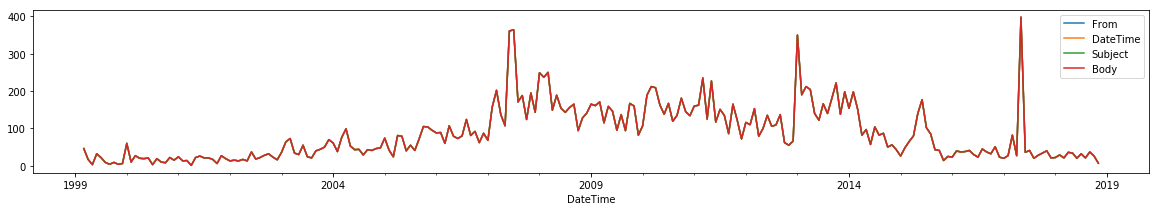

In [123]:
total_bldgsim.resample('M').count().plot(figsize=(20,3))

In [124]:
total_bldgsim.truncate(before='2017-05-08 18:01:20', after='2017-05-08 18:35').Subject[0]#.resample('D').count().plot(figsize=(20,3))


'Re: [Bldg-sim] Your mail to rodrigo.cerqueira@mra.qc.ca'

In [125]:
total_bldgsim = total_bldgsim[~total_bldgsim.Subject.str.contains("rodrigo.cerqueira@mra.qc.ca")]

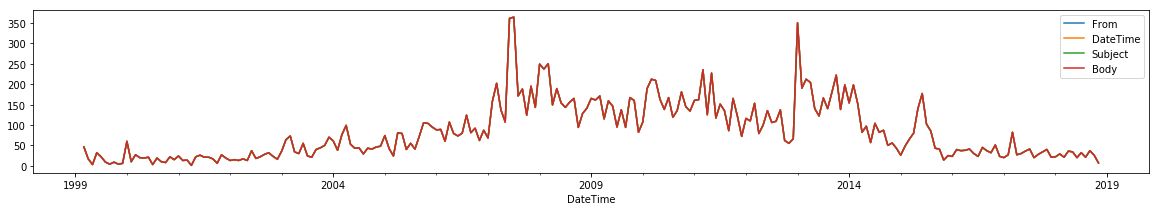

In [126]:
total_bldgsim.resample('M').count().plot(figsize=(20,3))

In [174]:
total_bldgsim.truncate(before='2013-01-09', after='2013-01-11')#.resample('D').count().plot(figsize=(20,3))


,From,DateTime,Subject,Body
DateTime,,,,
2013-01-09 04:19:50,shanta.tucker at atelierten.com (Shanta Tucke...,2013-01-09 04:19:50,Call for nominations: IBPSA-USA board of dire...,From: shanta.tucker at atelierten.com (Shanta ...
2013-01-09 04:19:50,shanta.tucker at atelierten.com (Shanta Tucke...,2013-01-09 04:19:50,Call for nominations: IBPSA-USA board of dire...,From: shanta.tucker at atelierten.com (Shanta ...
2013-01-09 15:07:47,jglazer at gard.com (Jason Glazer)\n,2013-01-09 15:07:47,Help Review Energy Efficiency Measure List fo...,From: jglazer at gard.com (Jason Glazer)\n Dat...
2013-01-09 15:07:47,jglazer at gard.com (Jason Glazer)\n,2013-01-09 15:07:47,Help Review Energy Efficiency Measure List fo...,From: jglazer at gard.com (Jason Glazer)\n Dat...
2013-01-09 15:56:03,shanta.tucker at atelierten.com (Shanta Tucke...,2013-01-09 15:56:03,Call for nominations: IBPSA-USA board of dire...,From: shanta.tucker at atelierten.com (Shanta ...
2013-01-09 15:56:03,shanta.tucker at atelierten.com (Shanta Tucke...,2013-01-09 15:56:03,Call for nominations: IBPSA-USA board of dire...,From: shanta.tucker at atelierten.com (Shanta ...
2013-01-09 15:59:55,francesco.passerini at inwind.it (francesco.p...,2013-01-09 15:59:55,About LEED new version\n,From: francesco.passerini at inwind.it (france...
2013-01-09 15:59:55,francesco.passerini at inwind.it (francesco.p...,2013-01-09 15:59:55,About LEED new version\n,From: francesco.passerini at inwind.it (france...
2013-01-10 07:48:37,robert at wichert.org (RobertWichert)\n,2013-01-10 07:48:37,90.1 Occupancy\n,From: robert at wichert.org (RobertWichert)\n ...


In [127]:
total_bldgsim.to_pickle("/Users/nus/twenty-years-of-bldgsim-textmining/total_email_data.pkl")

# Create an Array for the tfidf process

In [148]:
#df = df.fillna("x")

In [149]:
#bldgsimdata.info()

In [152]:
out_array = np.array(total_bldgsim.fillna("x").Body)

In [153]:
#out_array_new = np.array(df['from']+" "+df["date"].astype("str")+" "+df["subject"]+" "+df["body"])

In [157]:
#len(out_array_old)

In [158]:
#out_array = np.concatenate([out_array_old,out_array_new])

In [159]:
len(out_array)

20029

# Stop words from the bodies

In [357]:
os.chdir("/Users/nus/twenty-years-of-bldgsim-textmining/")

In [358]:
custom_stop_words = []
with open( "stopwords.txt", "r" ) as fin:
    for line in fin.readlines():
        custom_stop_words.append( line.strip() )
# note that we need to make it hashable
print("Stopword list has %d entries" % len(custom_stop_words) )

In [359]:
from sklearn.feature_extraction.text import CountVectorizer
# use a custom stopwords list, set the minimum term-document frequency to 20
vectorizer = CountVectorizer(stop_words = custom_stop_words, min_df = 20, encoding='latin-1')
A = vectorizer.fit_transform(out_array)
print( "Created %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

In [360]:
# extract the resulting vocabulary
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

In [361]:
from sklearn.externals import joblib
joblib.dump((A,terms), "emails-raw.pkl") 

['emails-raw.pkl']

# TFIDF Weighting

In [362]:
from sklearn.feature_extraction.text import TfidfVectorizer
# we can pass in the same preprocessing parameters
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, min_df = 20, encoding='latin-1')
A = vectorizer.fit_transform(out_array)
print("Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

In [363]:
import operator
def rank_terms( A, terms ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [364]:
ranking = rank_terms( A, terms )
for i, pair in enumerate( ranking[0:200] ):
    print( "%s" % (pair[0]) )

In [369]:
#ranking

In [366]:
#snippets[:1]

In [367]:
joblib.dump((A,terms), "emails-tfidf.pkl") 

['emails-tfidf.pkl']